<a href="https://colab.research.google.com/github/helenabarmer/ms_ffa_farmebeats/blob/master/Project_farmbeats1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
Notes:
some starter data sets: https://github.com/Prtfw/ms_ffa_farmebeats/tree/master/data
you can find any (ideally USA) agriculture related datasets as long as the license is appropriate for commercial use (Please ping me to confirm)
https://catalog.data.gov/dataset?groups=agriculture8571#topic=food_navigation 
Or kaggle: look for data sets with creative commons license 
we need to cite the data properly so make sure we keep track of urls : )

target audience: high school students and teachers from rural communities
goal: help them understand how data (science) and ML can help them be better future farmers... 
  - get them excited about ds and ml
  - make examples very relevant and applicable 
  - the goal is not to help them become data scientist or ML programmers, so they should not have to write / edit code or do anything related to github... 
    - each of the notebooks / labs must be able to be run "top down" and must have no errors if you do "run all" : )
    - any package you use... please add at the top a import and the install i.e. even though matplotlib is already installed and pandas is installed we still have to have a cell that is 
    !pip install matplotlib, pandas, numpy 
      etc... 
  - this notebook will be convereted into a jupyter notebook (because it's MSFT and they don't like google colab : )
  - for each section of content... we should mention
    - how does this could help you (a future farmer) be more successful 
    - what insights / conlusions / questions can you draw based on what we just did if this was your farm?
  i.e. 
  "how this helps"
   noticing a outlier means you can detect trouble early... i.e. if temperature is much lower this year than last year maybe your wheat yield will be lower... maybe you should consider adding more fertilizers or prepare to plan crops that will thrive in lower temperatures (just as a random example)...
   or
  "what can you say if this was your farm / data?"
   noticing that soil temp is highest around 1pm means if you water your crops before that most of it will likely just evaporate...so you could consider watering earlier or later in the day. (based on the fake sensor data in the repo)

SyntaxError: ignored

## Welcome!

In this session we will learn how to work with datasets and make them useful for agriculture. 

What is data? <br>
What is a dataset? <br>
(add examples) <br>
How can data be collected? <br>


# Preparation
<img src="https://images.unsplash.com/photo-1499750310107-5fef28a66643?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80" width="400" title="Photo by Andrew Neel on Unsplash">

## Install packages
* Before we start we need to install everything we will need to run this demo.
* We will use **pip** to install what we need. 
* pip is the standard package manager for Python. It will add the additional libraries we need to work with in an easy way. If you want to know more about this follow this [link](https://pypi.org/project/pip/).



In [0]:
pip install pandas

In [0]:
pip install matplotlib

In [0]:
pip install seaborn

In [0]:
pip install numpy

In [61]:
# Install ipywidgets to be able to create interactive buttons
pip install ipywidgets


## Import libraries
Now we will go ahead and import the libraries we have installed so we can start using them.
<br>

For more information about the libraries follow the links below:
* [pandas](https://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)
* [numpy](https://numpy.org/)

In [2]:
# Python library for data analysis and manipulation 
import pandas as pd

# Interactive visualizations in Python
import matplotlib.pyplot as plt

# Python data visualization library based on matplotlib.
import seaborn as sns

# Scientific computing with Python
import numpy as np

# We will import this to create buttons and interactive slides
import ipywidgets as widgets
from ipywidgets import Button, Layout
from IPython.display import clear_output

# Magic funtion in Python (we will not deep diver into this for now)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Functions that will be used further down in the code (skip these)
def on_button_clicked(_):
    print("Answer is:\ncrop_production_URL = 'https://raw.githubusercontent.com/helenabarmer/dl-datasets/master/crop_production.csv' ")

button = widgets.Button(description="Click to see answer!")

def statistics(_):
  print("1. Measures of central tendency: mean \n2. Measures of variability (spread): std, min, 25%, 50%, 75%, max")
  
stats_button = widgets.Button(description="Click to see answer!")
stats_button.on_click(statistics)

# Part 1 - Let's begin!

## Datasets
* We will start with a dataset from a GitHub link.<br>
* The link contains the data in a raw format.
* If you have not used GitHub before you can learn  more [here](https://guides.github.com/activities/hello-world/). 


In [5]:
# Example of how to get data from urls on github:
url_data = 'https://raw.githubusercontent.com/Prtfw/ms_ffa_farmebeats/master/data/garden_sesnsor_generated_data.csv'

# This will load our data to a DataFrame (df)
df = pd.read_csv(url_data)

print("The data is ready! ")

The data is ready! 


## Comments and Code
* When we want to make a comment about the code we use this format with the character "#" in front of it:<br>
`# This is a comment ` <br>

* Below the comment we will add the code for you.
The comment will not part of the code when we run the cells.

* Example below this cell, don't worry about the code below we will cover that soon.




In [7]:
# This is the comment we just mentioned
df.head(1)

,Date,Time,Soil Temp (C),Soil Moisture,Temperature (C),Humidity (%),Pressure (hPa),Light - Visible (Lumens),Light - UV (UV Spectrum)
0,3/25,10:00,49,5.3,58,19,1030.0,755.0,8.88


In [8]:
# Now we can check the shape of our data with df.shape
print(f"Rows and columns:{df.shape}\n")

# We can also extract only the rows
rows = df.shape[0]

print(f"Rows: {rows}\n")

# This is how we extract only the columns 
columns = df.shape[1]
print(f"Columns: {columns}")

Rows and columns:(672, 9)

Rows: 672

Columns: 9


## Count From Zero
Below we will have a look at the first and last 5 rows of our dataset.<br>
Note that we always start counting from index 0 (zero).
This is something that is done within the programming world but you only need to know this is the way it works for now. 
<br>
<br>
The first 5 rows will be:<br>**0 - 1 - 2 - 3 - 4** <br>(1 - 2 - 3 - 4 - 5)


<img src="https://images.unsplash.com/photo-1479231233972-e184fe70398e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1056&q=80" width="400" title="Photo by Austin Neill on Unsplash">
 

In [14]:
# First 5 rows of the dataset
df.head()

,Date,Time,Soil Temp (C),Soil Moisture,Temperature (C),Humidity (%),Pressure (hPa),Light - Visible (Lumens),Light - UV (UV Spectrum)
0,3/25,10:00,49,5.3,58,19,1030.0,755.0,8.88
1,3/25,11:00,50,6.9,65,23,1036.1,813.0,9.56
2,3/25,12:00,52,7.6,67,27,1039.4,806.0,9.48
3,3/25,13:00,54,6.5,67,30,1044.2,748.0,8.80
4,3/25,14:00,56,5.4,68,35,1042.2,643.5,7.57


The last 5 rows of the dataset will stop at **671** even thought we saw earlier that the shape is **672**. <br>This is because our counting starts with 0.

In [16]:
# Last 5 rows of the dataset
df.tail()

,Date,Time,Soil Temp (C),Soil Moisture,Temperature (C),Humidity (%),Pressure (hPa),Light - Visible (Lumens),Light - UV (UV Spectrum)
667,4/22,5:00,54,3.9,42,88,1006.9,67.85,0.79
668,4/22,6:00,53,3.3,46,85,1009.6,111.60,1.31
669,4/22,7:00,53,2.8,49,78,1011.7,172.80,2.03
670,4/22,8:00,52,3.6,51,70,1014.4,221.60,2.60
671,4/22,9:00,52,2.9,53,67,1015.7,288.60,3.39


In [17]:
# Returns 5 random samples from the dataset
df.sample(5)

,Date,Time,Soil Temp (C),Soil Moisture,Temperature (C),Humidity (%),Pressure (hPa),Light - Visible (Lumens),Light - UV (UV Spectrum)
654,4/21,16:00,63,4.5,66,23,1032.7,272.50,3.20
598,4/19,8:00,51,4.2,54,74,1015.7,378.50,4.45
15,3/26,1:00,56,6.6,43,47,1010.3,0.00,0.00
622,4/20,8:00,51,3.5,61,58,1022.5,567.40,6.67
442,4/12,20:00,56,3.9,42,26,1006.3,0.01,0.00


## Columns values
We can see that our data contains these 9 values:


1.   Date
2.   Time
3. Soil Temp (C)
4. Soil Moisture 
5. Temperature (C)
6. Humidity (%)
7. Pressure (hPa)
8. Light - Visible (Lumens)
9. Light - UV (UV Spectrum)



In [0]:
# This will also show all the column values
df.columns

## Application Part 1
Have a look at the column values above think about why these column values would be useful for agriculture. How can this information help?

Could it help to...
*  find  optional conditions?
* increase quantity?
* add to crop quality?
* see optional time and date for soil moisture?

<img src="https://images.unsplash.com/photo-1494883759339-0b042055a4ee?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=967&q=80" width="400" title="Photo by Brad Neathery on Unsplash">

<br>

##### *We will continue to explore the dataset and find more applications for the columns values.*



# Part 2 - Dealing with missing data

## Missing data
If a value is missing in the data it will be displayed as **NaN** (Not a Number).
<br>
We will use a function that returns a **boolean** value to see if there is something missing. The boolean value returns either **True** or **False**.

*   **isnull()** - This returns False if there are no NaN values. 
<br>If there are missing values this will reurn True.
*   **any()** - This method will return True if there are no missing values. If values are missing (NaN) it will return False.

<br> 
##### Let us examine the data and see if any values are missing. <br>

##### We will combine **isnull()** and **any()** to see missing values

In [0]:
# isnull() returns a boolean value, either True or False
df.isnull().any()

There are no missing values in our data, but let us check with only the **any()** method as well.

In [0]:
# Check if there are NOT any NaN (missing) values 
df.any()

We can also use **sum()** to sum up all the missing values in our data. <br>
This will be 0 as our data does not contain any missing values.

In [0]:
print(f"COLUMNS                SUM (NaN):\n{df.isnull().sum()}")

### How would we handle missing data if we found any?

1.   Delete missing values
2. Replace missing values

Let us have a look at another dataset to see how we can handle missing data.
<br> 



## Crop Production In India
<img src="https://images.unsplash.com/photo-1455157823797-3019317cbcf0?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80" width="400" title="Photo by Ravi Pinisetti on Unsplash">

This dataset is from a Kaggle Competition (online competion).
* More about [Kaggle](https://www.kaggle.com/)
* Link to Crop Production In India [dataset](https://www.kaggle.com/abhinand05/crop-production-in-india#crop_production.csv)     

<br>

Let us use a link from GitHub again to use this dataset.
<br>
Do you remember how we did this?


In [0]:
display(button)
button.on_click(on_button_clicked)

In [31]:
# Now we will add this and load the data
crop_production_URL = 'https://raw.githubusercontent.com/helenabarmer/dl-datasets/master/crop_production.csv'

# Load the data to DataFrame
df_crop = pd.read_csv(crop_production_URL)

# See the first 5 rows of the dataset
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Let us explore the dataset for missing values!

In [0]:
# Now we will find one column with missing data (True)
df_crop.isnull().any()

In [0]:
# We can also print and find the values like this
print(f" Columns with missing values: {df_crop.columns[df_crop.isnull().any()].tolist()}")

In [0]:
# Let us see how many values are missing
print(f"COLUMNS                SUM (NaN):\n{df_crop.isnull().sum()}")

Missing values from Production is 3730.
Let us go ahead and see different approaches to handle this. 
<br>

### Remove missing values
* We can remove missing values by using df_crop.dropna()
* We can replace the missing values

In [0]:
# Check type of the column 'Production'
df_crop.info()
df_crop.Production.dtypes

## Application Part 2
How could missing data (values) affect a dataset? <br>
How would it affect your intention with using these values?

<img src="https://images.unsplash.com/photo-1460518451285-97b6aa326961?ixlib=rb-1.2.1&auto=format&fit=crop&w=1050&q=80" width="400" title="Photo by Alexis Brown on Unsplash">




# Part 3 - Understand your data



To understand our data we will use something called *descriptive statistics*.
Statistics is a branch of mathematics and it will help us describe and organize our data. It will also help us make the data meaningful and more easy to understand and approach.

## **Descriptive statistics**
* Can represent the entire dataset or just a part of it
* Describes the data
* It is divided into 2 parts: 
  1. Measures of central tendency 
  2. Measures of variability (spread)  

## **Measures of central tendency** 
We are trying to describe our data by finding a number that is central to our dataset. The most common measures to do this are mean, median, and mode.

## **Measures of variability (spread)**
This will describe how spread out our data is.
We use the following to see this spread: <br>
Standard deviation, variance, the minimum and maximum variables, and the kurtosis and skewness.

## **Numerical or categorical data**
We need to examine our data to know if it is numerical or categorical. It is important for us to know the type of the data so we know how to use it later on.
* **Numerical**: Measurement
* **Categorical**: Non numerical information 

<br>

Let us find out the datatypes of the data and see whether it is numerical or categorical in nature by using the Crop Production In India dataset.





In [32]:
# See the first 5 rows of the dataset Crop Production In India
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [33]:
# Find the datatypes of the dataset Crop Production In India
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


By using **info()** we find out that we have 3 numerical datatypes and 4 categorical.

Let us have a look at the other farm dataset and see the datatypes.

In [34]:
# Farm dataset, see datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      672 non-null    object 
 1   Time                      672 non-null    object 
 2   Soil Temp (C)             672 non-null    int64  
 3   Soil Moisture             672 non-null    float64
 4   Temperature (C)           672 non-null    int64  
 5   Humidity (%)              672 non-null    int64  
 6   Pressure (hPa)            672 non-null    float64
 7   Light - Visible (Lumens)  672 non-null    float64
 8   Light - UV (UV Spectrum)  672 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 47.4+ KB


**Conclusion:** In this dataset we have more numerical datatypes.

**Let us go ahead and have a look at our data in the farm dataset and see if we can understand it better from the statistical details from it.**

In [10]:
# This will give us the statistical details 
df.describe()

,Soil Temp (C),Soil Moisture,Temperature (C),Humidity (%),Pressure (hPa),Light - Visible (Lumens),Light - UV (UV Spectrum)
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,54.011905,4.651935,52.607143,44.005952,1016.793304,249.771741,2.935506
std,4.689130,0.920164,10.547479,19.662729,10.433461,297.277305,3.495998
min,44.000000,2.600000,28.000000,12.000000,1000.200000,0.000000,0.000000
25%,51.000000,4.000000,45.000000,27.000000,1009.000000,0.010000,0.000000
50%,54.000000,4.550000,53.000000,42.000000,1015.700000,69.925000,0.815000
75%,57.000000,5.200000,60.000000,58.000000,1022.500000,480.925000,5.650000
max,65.000000,7.600000,73.000000,89.000000,1044.200000,857.000000,10.080000


## Statistical details

* **count:** Total number of values
* **mean:** The average of all the numbers
* **std:** Measure of how close the numbers are to the mean (average distance).
* **min:** The minimum value of all the numbers
* **25%:** 25th percentile
* **50%:** 50th percentile
* **75%:** 75th percentile
* **max:** The maximum value of all the numbers
<br>
<br>

## Why do I need to know about descriptive statistics?
Instead of manually going through all the rows and columns of the dataset and try to make sense of it, we use descriptive statistics to present the data in a simple way. By seeing an overview of the dataset you can find useful things like knowing the average humidity for our area or spread of temperature. <br> We can also see the sum of all the values we have added in our dataset. This will be useful when we collect the data.
<br>
<br>

## How can data be collected?
For agriculture sensors can be used to measure and report data for humidity, soil moisture and so on. <br>3 ways to collect this data is through: 
* Sensors
* Drones
* Satellites


<img src="https://images.unsplash.com/photo-1506947411487-a56738267384?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1049&q=80" width="300" title="Photo by david henrichs on Unsplash">

## Application Part 3

* Think about some different ways you could gather and collect data for agricultural needs.

* Can you divide the statistical expressions (mean, std, min, 25%, 50%, 75%, max) into these 2 categories ?
  1. Measures of central tendency 
  2. Measures of variability (spread)

<img src="https://images.unsplash.com/photo-1568650136602-ded24b86c5af?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80" width="300" title="Photo by Samia Liamani on Unsplash">

Click the button below to see the answer.

In [35]:
# This code only displays the button below
display(stats_button)

Button(description='Click to see answer!', style=ButtonStyle())

1. Measures of central tendency: mean 
2. Measures of variability (spread): std, min, 25%, 50%, 75%, max


# Part 4 - Visualize the data
We will use seaborn to visualize our data to see:

* Correlations / Relationships in our data
* Distribution / Shape of our dataset

## Relationships in our data
Relationships are also called correlations and it will show us if our data is related. 
From the visualization below we can see:
* Histograms for each individual variable (diagonal)
* Relationship between to variables  
We will start by having a look at all our columns and the relationship between them.

While looking at the visualization, see if you can figure out how we can find the relationship between columns.

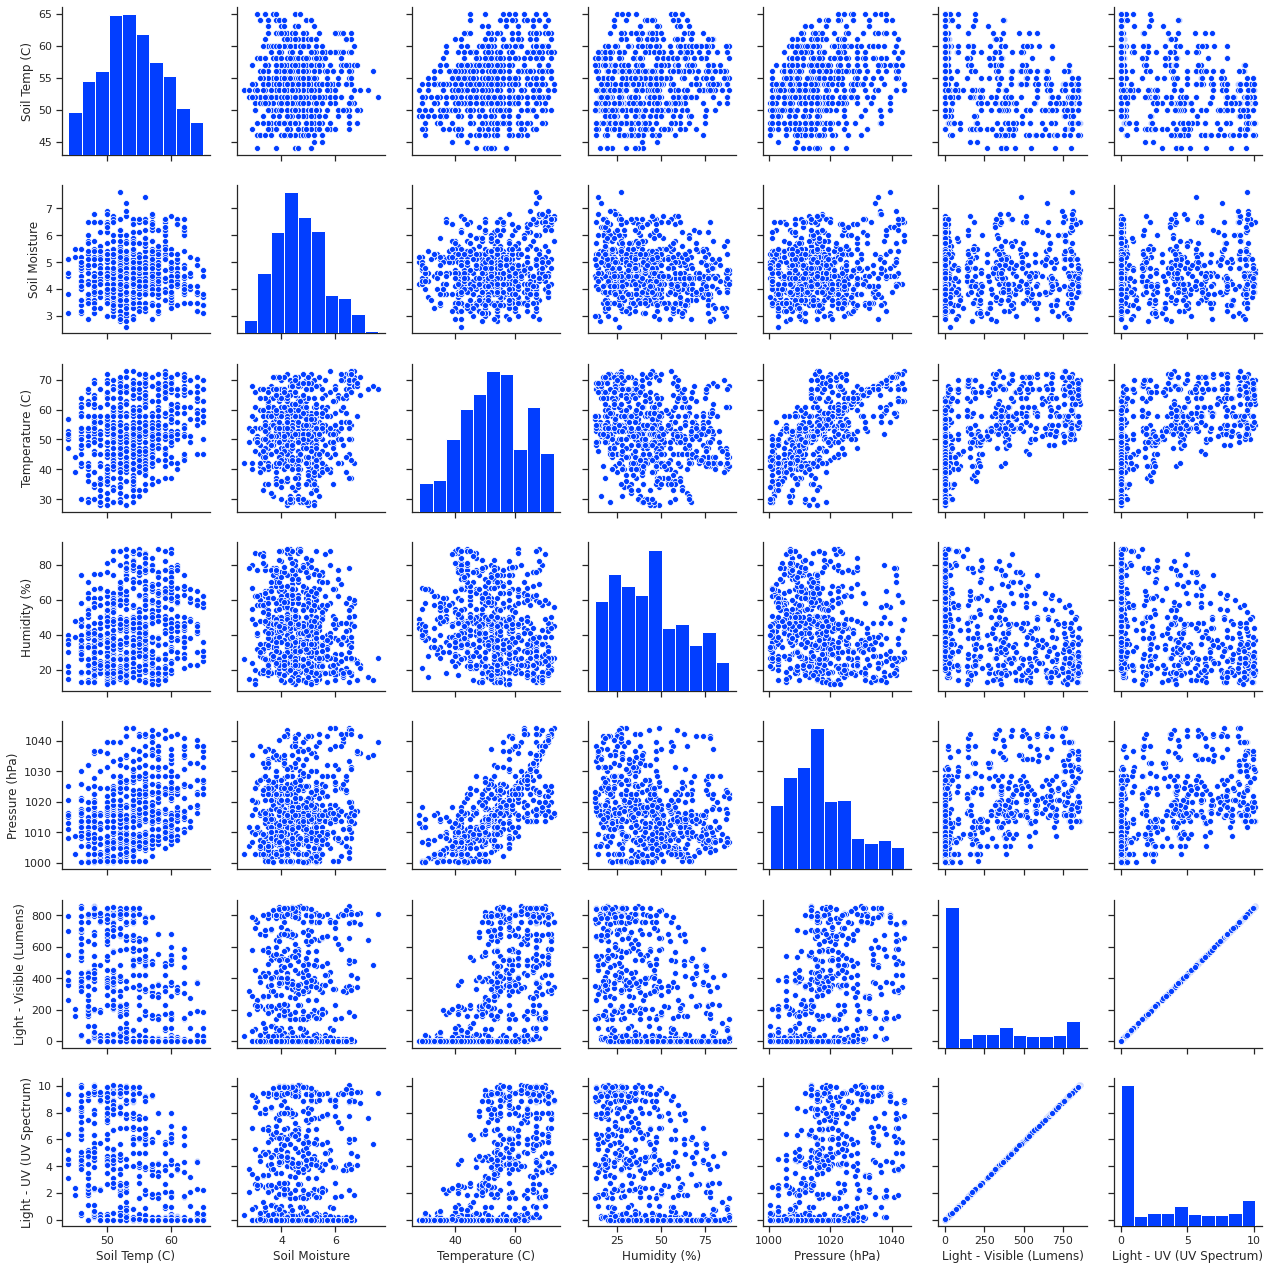

In [121]:
#palette = sns.set_palette("bright")
sns.set(style="ticks", color_codes=True, palette=sns.set_palette("bright"))
sns.pairplot(df)
plt.show()

# Heatmap
A heatmap is a great way to see the relationship of the different variables.
The result is displayed from the values -1 to +1. Variables tend to be more related the closer they are to -1 or +1. This is called "r".
* **r = -1**: Negative correlation, variables move in opposite directions
* **r = +1**: Positive correlation and positive increase of values

<br>

Have a look at the heatmap below and see if you can find any correlations from looking at the heatmap.


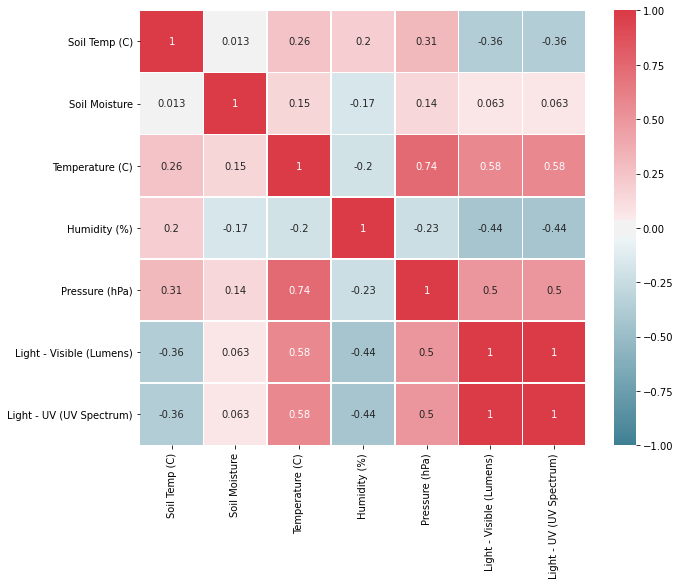

In [15]:
ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, linewidths=0.5, vmin=-1)

## Heatmap correlations
**r = 0.74** is the strongest positive correlation between Temperature (C) and Pressure (hPa).

## How can this be relevant?
Collecting data for a farm through a weather station could keep track of variation of temperature and pressure over time to better plan for the crop.

## Correlation between 2 variables
This was a great way to see an overview, but it would be easier to choose correlations for one of the variables and focus on that.

If the scatter plots (the blue dots) are clustering together it is a sign they could have a positive correlation (relationship). If the dots are far away from each other or scattered around they are most likely not related positively.
<br>

Let us pick 1 correlation we have noticed in the visualization above.
* Humidity (%) and Soil Moisture

To make it easier we will plot the relationship between only this instead.

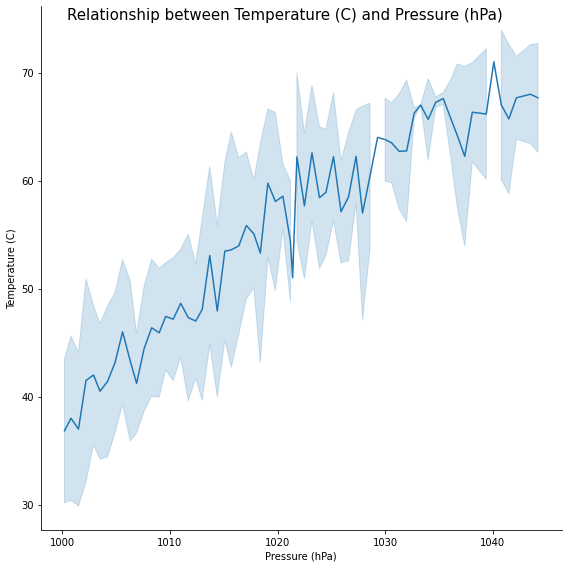

In [74]:
sns.relplot(x='Pressure (hPa)', y='Temperature (C)', data=df, kind="line", ci="sd", height=8 )
plt.suptitle('Relationship between Temperature (C) and Pressure (hPa)', 
             size = 15);

## Shape of our dataset
We want to examine and have a look how the variables are distributed (shaped) in our data. Below we can choose different columns and the the shape of the data. We can also call this shape Kerner Density Estimate (KDE). 


Source: [Interactive Visualization for Exploratory Data Analysis in Jupyter Notebook](https://medium.com/@ppeng08/interactive-visualization-for-exploratory-data-analysis-in-jupyter-notebook-adc826e1e76a)

In [89]:
@widgets.interact
def interactive_distplot(category = df.select_dtypes(exclude='object').columns):
  f, ax = plt.subplots(figsize=(10, 5))
  ax = sns.distplot(df[category], hist= False, kde_kws={"color": "g", "lw": 5, "label": "Shape of our data"})
  plt.show()

interactive(children=(Dropdown(description='category', options=('Soil Temp (C)', 'Soil Moisture', 'Temperature…

## Boxplot
A boxplot will show us how the values in our data are spread out. On the sides of the box there are "whiskers". The distance from the first whisker to the box is the 25%th percentile, followed by the box. In the box you will see a line which shows us the median or 50th percentile. From the end of the box to the whisker to the right we will see the 75th percentile.

### Outliers
Outliers are data points that are far away from the rest of the data.
They will be seen as small dots located away from the box.

## How is this useful?
We will see the variation of our data in one place and can easier get an overview of it. In the visualization below you can check different categories by choosing from the category box.
If you have been collecting data for your farm it could be useful to see the median value and any outliers for your data.




In [108]:
@widgets.interact
def interactive_box(category = df.select_dtypes(exclude='object').columns):         
    fig, ax = plt.subplots(figsize=(10, 4))
    ax = sns.boxplot(x=df[category], color="r")                                        
    plt.show();


interactive(children=(Dropdown(description='category', options=('Soil Temp (C)', 'Soil Moisture', 'Temperature…

In [110]:
# Let us see how it changes over time during the day
@widgets.interact
def interactive_box(category = df.select_dtypes(exclude='object').columns):         
    fig, ax = plt.subplots(figsize=(20, 5))
    ax = sns.boxplot(x=df['Time'], y=df[category], color="g")                                        
    plt.show();

interactive(children=(Dropdown(description='category', options=('Soil Temp (C)', 'Soil Moisture', 'Temperature…

Use cases
Irrigation
Weather station